# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import csv
import gmaps

from pprint import pprint

# Import API key
from api_keys import api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities = cities[0:100] #comment out later

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Create an empty list to store the responses
response_json = []

# Make a request for each of the indices
# Pretty print JSON for all Cities
for city in cities:
    response = requests.get(url + city + "&appid=" + api_key)
    if response.status_code == 200:
        response = response.json()
        response_json.append(response)
        pprint(f"Now processing: Id= {response['id']} City= {response['name']} Country= {response['sys']['country']}")
#         pprint(response)
    else:
        pprint(f"City {city} doesn't exist in database")

'Now processing: Id= 6165406 City= Thompson Country= CA'
'Now processing: Id= 3530097 City= Champerico Country= MX'
'Now processing: Id= 4033077 City= Vaitape Country= PF'
'Now processing: Id= 2175403 City= Bluff Country= AU'
'Now processing: Id= 3932145 City= Pisco Country= PE'
'Now processing: Id= 2180815 City= Tuatapere Country= NZ'
'Now processing: Id= 2126199 City= Cherskiy Country= RU'
'Now processing: Id= 1015776 City= Bredasdorp Country= ZA'
'Now processing: Id= 5855927 City= Hilo Country= US'
'Now processing: Id= 6170031 City= Tuktoyaktuk Country= CA'
'Now processing: Id= 344979 City= Lebu Country= ET'
'Now processing: Id= 1006984 City= East London Country= ZA'
'Now processing: Id= 3416888 City= Grindavik Country= IS'
'Now processing: Id= 151567 City= Nguruka Country= TZ'
'Now processing: Id= 2232283 City= Elat Country= CM'
'Now processing: Id= 6201424 City= Mataura Country= NZ'
'Now processing: Id= 2311127 City= Tshela Country= CD'
'Now processing: Id= 4030556 City= Rikitea C

'Now processing: Id= 2686162 City= Oskarshamn Country= SE'
'Now processing: Id= 1685422 City= Sulangan Country= PH'
'Now processing: Id= 3407378 City= Aracati Country= BR'
'Now processing: Id= 502265 City= Mirnyy Country= RU'
"City satitoa doesn't exist in database"
'Now processing: Id= 2155415 City= New Norfolk Country= AU'
'Now processing: Id= 4944903 City= Nantucket Country= US'
'Now processing: Id= 515246 City= Onega Country= RU'
'Now processing: Id= 3138076 City= Snasa Country= NO'
'Now processing: Id= 5421250 City= Englewood Country= US'
'Now processing: Id= 5882953 City= Aklavik Country= CA'
'Now processing: Id= 1529484 City= Hami Country= CN'
'Now processing: Id= 2126123 City= Chokurdakh Country= RU'
'Now processing: Id= 4020109 City= Atuona Country= PF'
'Now processing: Id= 504269 City= Pudozh Country= RU'
'Now processing: Id= 6320062 City= Vila Velha Country= BR'
'Now processing: Id= 3463237 City= Florianopolis Country= BR'
"City ascension doesn't exist in database"
'Now proc

"City meyungs doesn't exist in database"
'Now processing: Id= 2306104 City= Accra Country= GH'
'Now processing: Id= 3471451 City= Arraial do Cabo Country= BR'
'Now processing: Id= 2156643 City= Mount Gambier Country= AU'
'Now processing: Id= 324768 City= Akdagmadeni Country= TR'
"City gulshat doesn't exist in database"
'Now processing: Id= 1256949 City= Sawai Madhopur Country= IN'
'Now processing: Id= 117656 City= Salmas Country= IR'
'Now processing: Id= 3996663 City= Manzanillo Country= MX'
'Now processing: Id= 4792494 City= Waverly Country= US'
'Now processing: Id= 2304548 City= Anloga Country= GH'
'Now processing: Id= 3720455 City= Moron Country= HT'
"City ust-kamchatsk doesn't exist in database"
'Now processing: Id= 762909 City= Ostroleka Country= PL'
'Now processing: Id= 5961417 City= Husavik Country= CA'
'Now processing: Id= 3609418 City= San Cristobal Country= HN'
'Now processing: Id= 6068416 City= Mayo Country= CA'
'Now processing: Id= 2123100 City= Myaundzha Country= RU'
"City

'Now processing: Id= 5977046 City= Hornepayne Country= CA'
'Now processing: Id= 1789647 City= Xichang Country= CN'
'Now processing: Id= 3421319 City= Nuuk Country= GL'
'Now processing: Id= 3470709 City= Barra do Garcas Country= BR'
'Now processing: Id= 3521972 City= Panaba Country= MX'
'Now processing: Id= 2026786 City= Berezovyy Country= RU'
'Now processing: Id= 1648636 City= Bitung Country= ID'
'Now processing: Id= 2737599 City= Saldanha Country= PT'
'Now processing: Id= 1519938 City= Karatau Country= KZ'
"City asfi doesn't exist in database"
'Now processing: Id= 100926 City= Umm Lajj Country= SA'
"City ijaki doesn't exist in database"
'Now processing: Id= 2077895 City= Alice Springs Country= AU'
'Now processing: Id= 1293960 City= Taunggyi Country= MM'
'Now processing: Id= 2986626 City= Plouzane Country= FR'
'Now processing: Id= 115781 City= Shahr-e Babak Country= IR'
'Now processing: Id= 2025458 City= Chernyshevsk Country= RU'
'Now processing: Id= 119208 City= Qom Country= IR'
'Now 

'Now processing: Id= 1337607 City= Kudahuvadhoo Country= MV'
"City scottsburgh doesn't exist in database"
'Now processing: Id= 4984075 City= Alpena Country= US'
'Now processing: Id= 2120048 City= Ust-Nera Country= RU'
'Now processing: Id= 2032614 City= Baruun-Urt Country= MN'
'Now processing: Id= 2136825 City= Isangel Country= VU'
'Now processing: Id= 3577154 City= Oranjestad Country= AW'


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
my_dict = pd.Series()
my_df = pd.DataFrame()

# Specify the file to write to
output_path = os.path.join("output", "new.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(["Name","Longitude","Latitude","Temperature","Humidity","Cloudiness","Wind"])
   
    for x in response_json:
        my_dict= (x['name'],x['coord']['lon'],x['coord']['lat'],((x['main']['temp']-273.15)*9/5)+32,
                  x['main']['humidity'],x['clouds']['all'],x['wind']['speed'])
        csvwriter.writerow(my_dict) # Export to cvs file

# read from created cvs file
my_df = pd.read_csv(output_path, encoding="ISO-8859-1", low_memory=False)
my_df = my_df.sort_values('Temperature', ascending=True)
my_df.head()

,Name,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind
181,Aykhal,111.51,65.95,-25.600,67,100,4.00
39,Batagay,134.64,67.65,-21.640,98,45,0.52
302,Nefteyugansk,72.61,61.09,-18.400,82,0,2.00
151,Khatanga,102.47,71.98,-18.238,89,100,4.39
388,Talnakh,88.39,69.49,-14.800,75,0,2.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature in °F')

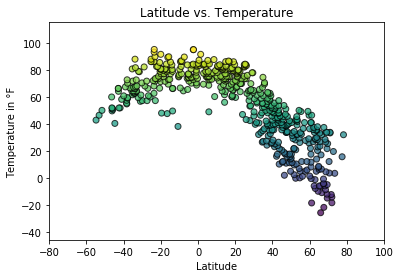

In [40]:
x_values = my_df['Latitude']
y_values = my_df['Temperature']
    
plt.scatter(x_values, y_values, marker="o", c=y_values, edgecolors="black", alpha=0.75)

plt.xlim(-80,100)
plt.ylim(min(my_df['Temperature'])-20, max(my_df['Temperature'])+20)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature in °F")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity in %')

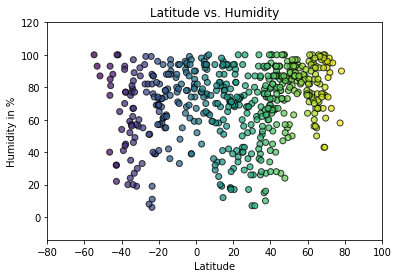

In [41]:
x_values = my_df['Latitude']
y_values = my_df['Humidity']
    
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)

plt.xlim(-80,100)
plt.ylim(min(my_df['Humidity'])-20, max(my_df['Humidity'])+20)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity in %")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

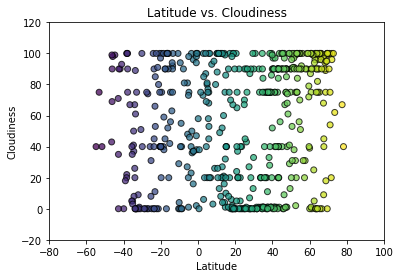

In [42]:
x_values = my_df['Latitude']
y_values = my_df['Cloudiness']
    
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)

plt.xlim(-80,100)
plt.ylim(min(my_df['Cloudiness'])-20, max(my_df['Cloudiness'])+20)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Wind Speed')

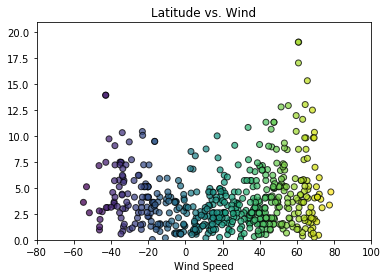

In [43]:
x_values = my_df['Latitude']
y_values = my_df['Wind']
    
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)

plt.xlim(-80,100)
plt.ylim(0, max(my_df['Wind'])*1.1)

plt.title("Latitude vs. Wind")
plt.xlabel("Wind Speed")